In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt

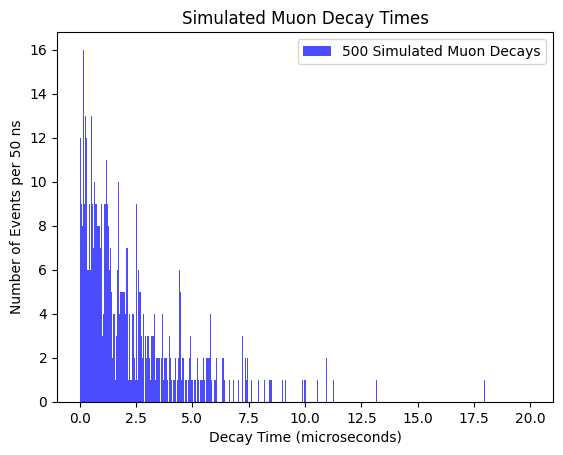

In [3]:
# next do 3000 decays

# Set the mean decay time (in units of microseconds)
mean_decay_time = 2.197

# Set the number of simulated muon decays
num_decays = 500

# Generate random decay times from an exponential distribution
decay_times = np.random.exponential(scale=mean_decay_time, size=num_decays)

# Plot the histogram
plt.hist(decay_times, bins=np.linspace(0, 20, 400), density=False, alpha=0.7, color='blue', label='500 Simulated Muon Decays')
# note plotting from 0 to 20 microseconds using bins of 50 ns, as is used for the maximum likelihood fit 
# Add labels and legend
plt.xlabel('Decay Time (microseconds)')
plt.ylabel('Number of Events per 50 ns') # note: decays will be referred to as events henceforth in notebook
plt.title('Simulated Muon Decay Times')
plt.legend()

# Show the plot
plt.show()

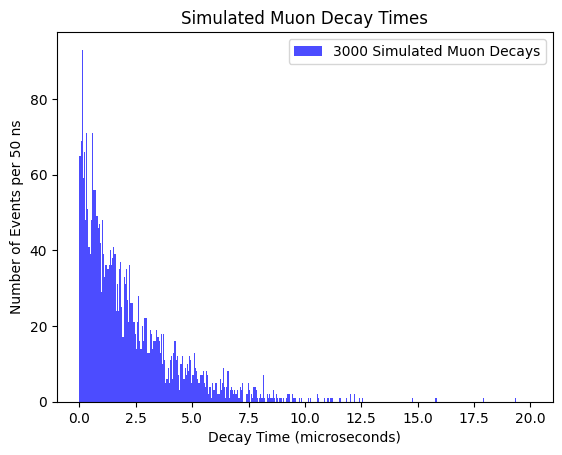

In [4]:
# next do 3000 decays

# Set the mean decay time (in units of microseconds)
mean_decay_time = 2.197

# Set the number of simulated muon decays
num_decays = 3000

# Generate random decay times from an exponential distribution
decay_times = np.random.exponential(scale=mean_decay_time, size=num_decays)

# Plot the histogram
plt.hist(decay_times, bins=np.linspace(0, 20, 400), density=False, alpha=0.7, color='blue', label='3000 Simulated Muon Decays')
# note plotting from 0 to 20 microseconds using bins of 50 ns, as is used for the maximum likelihood fit 
# Add labels and legend
plt.xlabel('Decay Time (microseconds)')
plt.ylabel('Number of Events per 50 ns')
plt.title('Simulated Muon Decay Times')
plt.legend()

# Show the plot
plt.show()

[2.17799764]
+-
0.09870418877797445
2.1762366387838976
+-
0.12695750655798455


C:\Users\Mark Larson\AppData\Local\Temp\ipykernel_38824\4249727764.py:53: RuntimeWarning: divide by zero encountered in divide
  plt.errorbar(bin_centers, hist, yerr=1/np.sqrt(hist), fmt='o', color='blue', label='Simulated Data (500 Decays)')
C:\Users\Mark Larson\AppData\Local\Temp\ipykernel_38824\4249727764.py:62: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_fit, y_fit_ols, 'r--', label=f'OLS Fitted Exp (Mean LT (microseconds)={fit_scale_ols:.3f})', color='green')


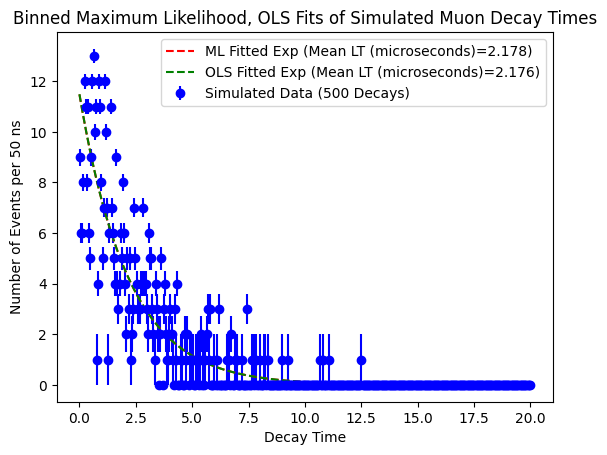

In [9]:
from scipy.stats import expon
from scipy.optimize import minimize

# Set the mean decay time (in arbitrary units)
mean_decay_time = 2.197

# Set the number of simulated muon decays
num_decays = 500

# Generate random decay times from an exponential distribution
decay_times = np.random.exponential(scale=mean_decay_time, size=num_decays)

# Create a histogram with error bars
hist, bin_edges = np.histogram(decay_times, bins=np.linspace(0, 20, 400), density=False)
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
bin_width = bin_edges[1] - bin_edges[0]

# Define the negative log-likelihood function for fitting
def neg_log_likelihood(params, data, bins):
    y = expon.pdf(bins, scale=params[0])*num_decays
    y /= np.sum(y) * (bins[1] - bins[0])  # Normalize the model
    return -np.sum(data * np.log(y + 1e-10))  # Add small value to prevent log(0) errors

# Perform the Maximumum Likelihood fit
initial_params = [mean_decay_time]
result = minimize(neg_log_likelihood, initial_params, args=(hist, bin_centers), method='L-BFGS-B') # miminize negative log(likelihood) = maximize log(Likelihood)

# Get the fitted parameters
fit_params = result.x
print(fit_params)
print("+-")

cov_matrix = result.hess_inv.todense()
# Extract the standard deviation (uncertainty) of the fitted parameter
fit_param_uncertainty = np.sqrt(np.diag(cov_matrix))[0]
print(fit_param_uncertainty)

# Perform an exponential OLS fit (using SciPy)

params = expon.fit(decay_times, floc=0)
fit_scale_ols = params[1]

residuals = expon.pdf(decay_times, *params) - fit_scale_ols

# Calculating the variance of the error term
sigma_ols = np.sqrt(np.var(residuals))

print(fit_scale_ols)
print("+-")
print(sigma_ols)

# Plot the histogram with error bars
plt.errorbar(bin_centers, hist, yerr=1/np.sqrt(hist), fmt='o', color='blue', label='Simulated Data (500 Decays)')

# Plot the fitted exponential distribution
x_fit = np.linspace(0, 20, 400)
y_fit = expon.pdf(x_fit, scale=fit_params[0]) 
y_fit_ols = expon.pdf(x_fit, scale=fit_scale_ols)
y_fit_ols *= num_decays/20 # scale y fits by num_decays / total time 
y_fit *= num_decays/20 
plt.plot(x_fit, y_fit, 'r--', label=f'ML Fitted Exp (Mean LT (microseconds)={fit_params[0]:.3f})')
plt.plot(x_fit, y_fit_ols, 'r--', label=f'OLS Fitted Exp (Mean LT (microseconds)={fit_scale_ols:.3f})', color='green')

# Add labels and legend
plt.xlabel('Decay Time')
plt.ylabel('Number of Events per 50 ns')
plt.title('Binned Maximum Likelihood, OLS Fits of Simulated Muon Decay Times')
plt.legend()

# Show the plot
plt.show()

[2.18545007]
+-
0.04029670945381123
2.1833248745703027
+-
0.13035126332211358


C:\Users\Mark Larson\AppData\Local\Temp\ipykernel_38824\2719795606.py:53: RuntimeWarning: divide by zero encountered in divide
  plt.errorbar(bin_centers, hist, yerr=1/np.sqrt(hist), fmt='o', color='blue', label='Simulated Data (3000 Decays)')
C:\Users\Mark Larson\AppData\Local\Temp\ipykernel_38824\2719795606.py:62: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_fit, y_fit_ols, 'r--', label=f'OLS Fitted Exp (Mean LT (microseconds)={fit_scale_ols:.3f})', color='green')


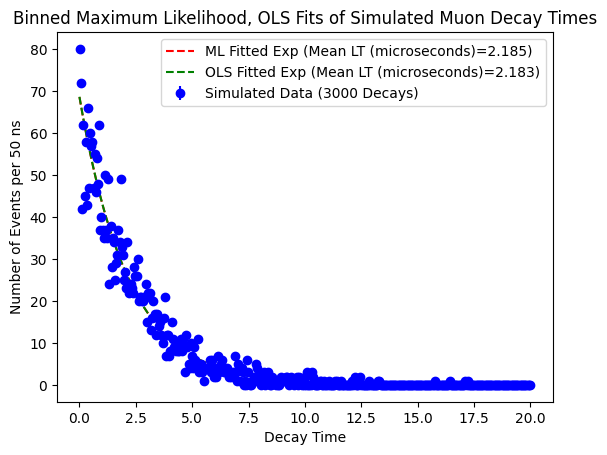

In [8]:
from scipy.stats import expon
from scipy.optimize import minimize

# Set the mean decay time (in arbitrary units)
mean_decay_time = 2.197

# Set the number of simulated muon decays
num_decays = 3000

# Generate random decay times from an exponential distribution
decay_times = np.random.exponential(scale=mean_decay_time, size=num_decays)

# Create a histogram with error bars
hist, bin_edges = np.histogram(decay_times, bins=np.linspace(0, 20, 400), density=False)
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
bin_width = bin_edges[1] - bin_edges[0]

# Define the negative log-likelihood function for fitting
def neg_log_likelihood(params, data, bins):
    y = expon.pdf(bins, scale=params[0])*num_decays
    y /= np.sum(y) * (bins[1] - bins[0])  # Normalize the model
    return -np.sum(data * np.log(y + 1e-10))  # Add small value to prevent log(0) errors

# Perform the Maximumum Likelihood fit
initial_params = [mean_decay_time]
result = minimize(neg_log_likelihood, initial_params, args=(hist, bin_centers), method='L-BFGS-B') # miminize negative log(likelihood) = maximize log(Likelihood)

# Get the fitted parameters
fit_params = result.x
print(fit_params)
print("+-")
cov_matrix = result.hess_inv.todense()

# Extract the standard deviation (uncertainty) of the fitted parameter
fit_param_uncertainty = np.sqrt(np.diag(cov_matrix))[0]
print(fit_param_uncertainty)

# Perform an exponential OLS fit (using SciPy)

params = expon.fit(decay_times, floc=0)
fit_scale_ols = params[1]

residuals = expon.pdf(decay_times, *params) - fit_scale_ols

# Calculating the variance of the error term
sigma_ols = np.sqrt(np.var(residuals))

print(fit_scale_ols)
print("+-")
print(sigma_ols)

# Plot the histogram with error bars
plt.errorbar(bin_centers, hist, yerr=1/np.sqrt(hist), fmt='o', color='blue', label='Simulated Data (3000 Decays)')

# Plot the fitted exponential distribution
x_fit = np.linspace(0, 20, 400)
y_fit = expon.pdf(x_fit, scale=fit_params[0]) 
y_fit_ols = expon.pdf(x_fit, scale=fit_scale_ols)
y_fit_ols *= num_decays/20 # scale y fits by num_decays / total time 
y_fit *= num_decays/20 
plt.plot(x_fit, y_fit, 'r--', label=f'ML Fitted Exp (Mean LT (microseconds)={fit_params[0]:.3f})')
plt.plot(x_fit, y_fit_ols, 'r--', label=f'OLS Fitted Exp (Mean LT (microseconds)={fit_scale_ols:.3f})', color='green')

# Add labels and legend
plt.xlabel('Decay Time')
plt.ylabel('Number of Events per 50 ns')
plt.title('Binned Maximum Likelihood, OLS Fits of Simulated Muon Decay Times')
plt.legend()

# Show the plot
plt.show()

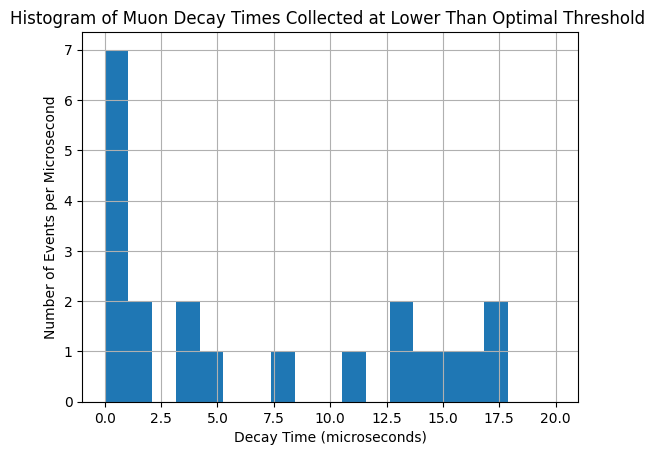

In [5]:
# Now will work with real data, convert .data format to same format as simulation to apply same fitting methods to overnight collected data
# and will only plot the ~20 muon decay varied threshold data 
lowerthresholddata = pd.read_csv('0.0997_LOWERTHRES_GJMN.csv', header=None)  # read in csv (converted from .data with excel)
#print(lowerthresholddata) # in 159 seconds of collected data (from Excel) 21 decays
lower_data_filtered = lowerthresholddata[lowerthresholddata.iloc[:, 0] < 40000] # filter out > 40000 (which don't represent muon decay)
lower_data_filtered *= 0.001 # convert from ns to microseconds
#print(lower_data_filtered) 

optimalthresholddata = pd.read_csv('0.1960_OPTIMALTHRES_GJMN.csv', header=None)  # read in csv (converted from .data with excel)
#print(optimalthresholddata) # in 786 seconds of collected data (from Excel) 23 decays
optimal_data_filtered = optimalthresholddata[optimalthresholddata.iloc[:, 0] < 40000] # filter out > 40000 (which don't represent muon decay)
optimal_data_filtered *= 0.001 # convert from ns to microseconds
#print(optimal_data_filtered)

higherthresholddata = pd.read_csv('0.3087_HIGHERTHRES_GJMN.csv', header=None)  # read in csv (converted from .data with excel)
#print(higherthresholddata) # in 834 seconds of collected data (from Excel) 20 decays
higher_data_filtered = higherthresholddata[higherthresholddata.iloc[:, 0] < 40000] # filter out > 40000 (which don't represent muon decay)
higher_data_filtered *= 0.001 # convert from ns to microseconds
#print(higher_data_filtered)

overnightdata = pd.read_csv('overnight_0.1974.csv', header=None)  # read in csv (converted from .data with excel)
#print(overnightdata) # in 247867 seconds of collected data (from Excel) 4944 decays
overnight_data_filtered = overnightdata[overnightdata.iloc[:, 0] < 40000] # filter out > 40000 (which don't represent muon decay)
overnight_data_filtered *= 0.001 # convert from ns to microseconds
#print(overnight_data_filtered) 


lower_data_filtered.hist(bins=np.linspace(0, 20, 20))  
plt.xlabel('Decay Time (microseconds)')
plt.ylabel('Number of Events per Microsecond')
plt.title('Histogram of Muon Decay Times Collected at Lower Than Optimal Threshold ')
plt.show()

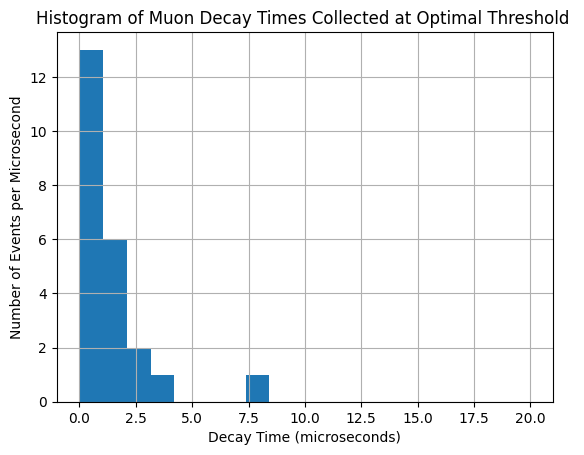

In [6]:
# Optimal Histogram 
optimal_data_filtered.hist(bins=np.linspace(0, 20, 20))  # Adjust the number of bins as needed
plt.xlabel('Decay Time (microseconds)')
plt.ylabel('Number of Events per Microsecond')
plt.title('Histogram of Muon Decay Times Collected at Optimal Threshold ')
plt.show()

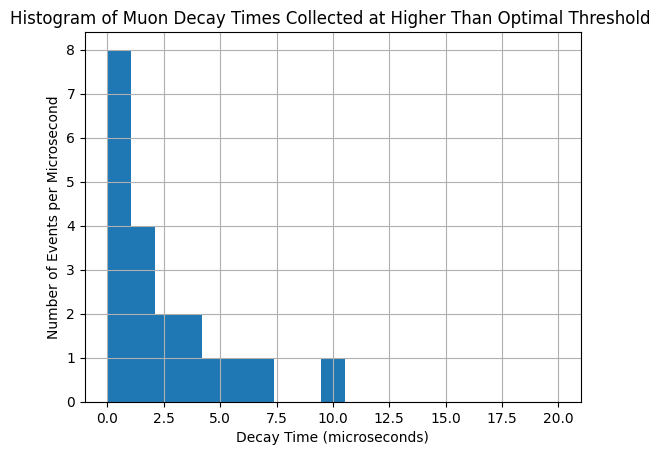

In [7]:
# higher than threshold histogram
higher_data_filtered.hist(bins=np.linspace(0, 20, 20))  
plt.xlabel('Decay Time (microseconds)')
plt.ylabel('Number of Events per Microsecond')
plt.title('Histogram of Muon Decay Times Collected at Higher Than Optimal Threshold ')
plt.show()

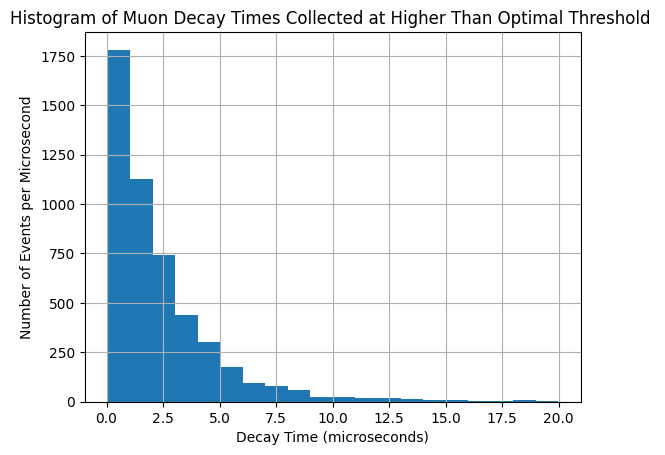

In [46]:
# overnight collected data that will be fit, later split into 500 groups and refit each time
overnight_data_filtered.hist(bins=20)  
plt.xlabel('Decay Time (microseconds)')
plt.ylabel('Number of Events per Microsecond')
plt.title('Histogram of Muon Decay Times Collected at Higher Than Optimal Threshold ')
plt.show()

[2.31067874]
+-
0.03321430391099236
2.1762366387838976
+-
0.12695750655798455


C:\Users\Mark Larson\AppData\Local\Temp\ipykernel_38824\1614619019.py:43: RuntimeWarning: divide by zero encountered in divide
  plt.errorbar(bin_centers, hist, yerr=1/np.sqrt(hist), fmt='o', color='blue', label='Collected Data (4944 Decays)')
C:\Users\Mark Larson\AppData\Local\Temp\ipykernel_38824\1614619019.py:52: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_fit, y_fit_ols, 'r--', label=f'OLS Fitted Exp (Mean LT (microseconds)={fit_scale_ols:.3f})', color='green')


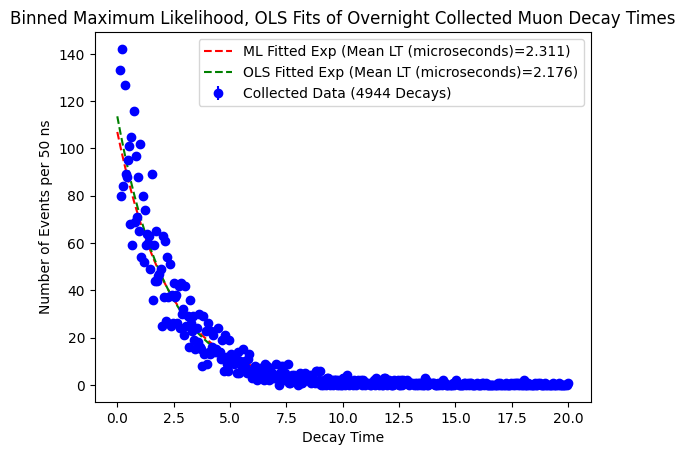

In [10]:

# Create a histogram with error bars
hist, bin_edges = np.histogram(overnight_data_filtered, bins=np.linspace(0.1, 20, 400), density=False) # 0.1 to avoid an outlier at 0 on the plot 
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
bin_width = bin_edges[1] - bin_edges[0]

num_decays = 4944

# Define the negative log-likelihood function for fitting
def neg_log_likelihood(params, data, bins):
    y = expon.pdf(bins, scale=params[0])*num_decays
    y /= np.sum(y) * (bins[1] - bins[0])  # Normalize the model
    return -np.sum(data * np.log(y + 1e-10))  # Add small value to prevent log(0) errors

# Perform the Maximumum Likelihood fit
initial_params = [mean_decay_time]
result = minimize(neg_log_likelihood, initial_params, args=(hist, bin_centers), method='L-BFGS-B') # miminize negative log(likelihood) = maximize log(Likelihood)

# Get the fitted parameters
fit_params = result.x
print(fit_params)
print("+-")

cov_matrix = result.hess_inv.todense()
# Extract the standard deviation (uncertainty) of the fitted parameter
fit_param_uncertainty = np.sqrt(np.diag(cov_matrix))[0]
print(fit_param_uncertainty)

# Perform an exponential OLS fit (using SciPy)

params = expon.fit(decay_times, floc=0)
fit_scale_ols = params[1]

residuals = expon.pdf(decay_times, *params) - fit_scale_ols

# Calculating the variance of the error term
sigma_ols = np.sqrt(np.var(residuals))

print(fit_scale_ols)
print("+-")
print(sigma_ols)

# Plot the histogram with error bars
plt.errorbar(bin_centers, hist, yerr=1/np.sqrt(hist), fmt='o', color='blue', label='Collected Data (4944 Decays)')

# Plot the fitted exponential distribution
x_fit = np.linspace(0, 20, 400)
y_fit = expon.pdf(x_fit, scale=fit_params[0]) 
y_fit_ols = expon.pdf(x_fit, scale=fit_scale_ols)
y_fit_ols *= 4944/20 # scale y fits by num_decays / total time 
y_fit *= 4944/20 
plt.plot(x_fit, y_fit, 'r--', label=f'ML Fitted Exp (Mean LT (microseconds)={fit_params[0]:.3f})')
plt.plot(x_fit, y_fit_ols, 'r--', label=f'OLS Fitted Exp (Mean LT (microseconds)={fit_scale_ols:.3f})', color='green')

# Add labels and legend
plt.xlabel('Decay Time')
plt.ylabel('Number of Events per 50 ns')
plt.title('Binned Maximum Likelihood, OLS Fits of Overnight Collected Muon Decay Times')
plt.legend()

# Show the plot
plt.show()

In [56]:
# Convert Pandas Series to a NumPy array
data_array = overnight_data_filtered.values

# Shuffle the data
np.random.shuffle(data_array)

# Split the shuffled data into groups of 500 data points each
group_size = 500
num_groups = len(data_array) // group_size
data_groups = np.array_split(data_array, num_groups)

# Print the number of data points in each group
for i, group in enumerate(data_groups):
    print(len(group))
    # Create a histogram with error bars
    hist, bin_edges = np.histogram(group, bins=np.linspace(0.1, 20, 400), density=False) # 0.1 to avoid an outlier at 0 on the plot 
    bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
    bin_width = bin_edges[1] - bin_edges[0]

    # Perform the Maximumum Likelihood fit
    initial_params = [mean_decay_time]
    result = minimize(neg_log_likelihood, initial_params, args=(hist, bin_centers), method='L-BFGS-B') # miminize negative log(likelihood) = maximize log(Likelihood)

    # Get the fitted parameters
    fit_params = result.x
    print(fit_params)
    print("+-")

    cov_matrix = result.hess_inv.todense()
    # Extract the standard deviation (uncertainty) of the fitted parameter
    fit_param_uncertainty = np.sqrt(np.diag(cov_matrix))[0]
    print(fit_param_uncertainty)
    
# note: each group has ~550 events since total 4944 events is not divisible by 500 

550
[2.3524807]
+-
0.10144555237940216
550
[2.35248075]
+-
0.10144123859125842
550
[2.17283131]
+-
0.09472869963409633
549
[2.24368793]
+-
0.09652825792515622
549
[2.33911846]
+-
0.10102540722714655
549
[2.3687815]
+-
0.10218951420718153
549
[2.52670333]
+-
0.11007429905158866
549
[2.23704684]
+-
0.09602027993156277
549
[2.20630042]
+-
0.09496472300606622
